## 0.1. Imports


# STEP 0

In [1]:
import os
import numpy                    as np
import pandas                   as pd
import seaborn                  as sns
import matplotlib.pyplot        as plt
from datetime                  import datetime

## 0.2. Funções de apoio

In [2]:
# ===================================================================
# Configura o notebook
def jupyter_settings():
    import warnings
    warnings.filterwarnings('ignore')
    %matplotlib inline

    # Tamanho e estilo dos gráficos
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [22, 9]
    plt.rcParams['font.size'] = 21

    # Configuração de exibição das linhas e colunas do pandas
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    # configuração do pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()

jupyter_settings()

# Imprime n gráficos do tipo boxplot lado a lado
def exibe_boxplot(data, col):
    indice = 1
    for coluna in data.columns:
        plt.subplot(1, col, indice)
        sns.boxplot(data[coluna]).set(title=coluna)
        indice += 1


# Imprime n gráficos do tipo countplot lado a lado
def exibe_countplot(data, col):
    indice = 1
    for coluna in data.columns:
        plt.subplot(1, col, indice)
        plt.xticks(rotation=90)
        sns.countplot(data=data, x=data[coluna]).set(title=coluna,  ylabel='Contagem', xlabel=None)
        indice += 1


def plota_ausentes(data, title, x_title, perc_minimo=0):
    """
    Plota uma tabela com a contagem de valores ausentes por coluna e um gráfico de
    barras com o percentual de ausentes por colunas caso existam dados ausentes,
    caso não, imprime o resultado de isna().sum()
    Params
    data: dataframe com os dados a serem plotados
    title: título do gráfico
    x_title: título do eixo x
    perc_minimo: percentual mínimo a ser plotado no gráfico
    """

    # Pega as colunas com dados ausentes
    colunas_com_nan = [col for col in data if data[col].isna().sum() > perc_minimo]

    # Plot do gráfico de barras com o percentual
    if len(colunas_com_nan) > 0:    # Se tiver colunas com dados faltantes
        ax = (  # Grafico                              
            data[colunas_com_nan]   # Dataframe a ser plotado no gráfico
            .isna() # Pegar valores faltantes
            .mean() # Pegar a média dos valores faltantes
            .sort_values(ascending=True)    # Ordenar os dados 
            .mul(100)   # multiplicar a média por 100 (percentual)
            .round(1)   # Arredondar as casas decimais para 1
            .plot(kind="barh")  # Tipo do gráfico (barras horizontais)
        )
        _ = ax.set_xlabel(x_title)  # Título do eixo x
        _ = ax.set_title(title) # Título do gráfico
        _ = ax.bar_label(ax.containers[0])  # Mostrar valores sobre as barras

        # Tabela da contagems dos dados faltantes
        print("Contagem de faltantes")
        print(data[colunas_com_nan].isna().sum().sort_values(ascending=True))
    else:   # Caso não exista dados faltantes imprime uma lista das colunas
        print('Contagem de faltantes')
        print(data.isna().sum())


def carrega_dados(caminho):
    lista_arquivos = os.listdir(caminho)
    lista_arquivos = [arquivo for arquivo in lista_arquivos if arquivo.endswith(".csv")]
    df_list = []

    for arquivo in lista_arquivos:
        caminho_arquivo = os.path.join(caminho, arquivo)
        # Tentar diferentes encodings
        try:
            df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='utf-8', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='latin-1', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
            except UnicodeDecodeError:
                df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='iso-8859-1', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
        df_list.append(df_temp)

    df = pd.concat(df_list, ignore_index=True)
    df_unicos = df.drop_duplicates(keep='first')

    return df_unicos


## 0.3. Carregando os dados

In [3]:
tudo = "../dados/csv"
a2022 = "../dados/csv/2022"
a2023 = "../dados/csv/2023"
a2024 = "../dados/csv/2024"
        
ano_2022 = carrega_dados(a2022)
ano_2023 = carrega_dados(a2023)
ano_2024 = carrega_dados(a2024)

df = pd.concat([ano_2022, ano_2023, ano_2024], ignore_index=True)

# 1 - Entendimento dos dados


In [4]:
df.head(3)

,Urgenza,Data Accesso,Data Fine Contatto,Struttura,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Struttura di Ricovero/Trasferimento,Et&agrave;,Fast Track,Operatore Triagista,Sessione Ticket,Data Nascita
0,3,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,NaN,43.00,NaN,CRESCINI SONIA,803877.00,1982-11-19
1,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,NaN,47.00,NaN,MACALUSO LIBORIO FABIO,804837.00,1978-05-11
2,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,POMA LORENZO,Ricoverato,Dolore toracico,2022000003,POLONI ALBERTO,CARDIOLOGIA\rPRESIDIO OSPEDALIERO CHIARI,75.00,NaN,MACALUSO LIBORIO FABIO,803945.00,1950-09-29


## 1.1. Renomear as colunas

In [5]:
df.columns

Index(['Urgenza', 'Data Accesso', 'Data Fine Contatto', 'Struttura',
       'Paziente', 'Modalità Dimissione', 'Problema Principale',
       'Numero Scheda PS', 'Medico Dimettente',
       'Struttura di Ricovero/Trasferimento', 'Et&agrave;', 'Fast Track',
       'Operatore Triagista', 'Sessione Ticket', 'Data Nascita'],
      dtype='object')

## 1.2. Volumetria dos dados

In [6]:
# Conferindo a volumetria
print(f"Quantidade de colunas:  {df.shape[1]}")
print(f"Quantidade de linhas:   {df.shape[0]}")
print(f"Cartões PS únicos:      {df['Numero Scheda PS'].nunique()}")
print(f"Quantidade de pazientes:{df['Paziente'].nunique()}")
print(f"Diferença pacientes por atendimento: {df.shape[0] - df['Numero Scheda PS'].nunique()}")

Quantidade de colunas:  15
Quantidade de linhas:   160011
Cartões PS únicos:      159815
Quantidade de pazientes:82136
Diferença pacientes por atendimento: 196


## 1.3. Tipos dos dados

In [7]:
df.dtypes

Urgenza                                         int64
Data Accesso                           datetime64[ns]
Data Fine Contatto                     datetime64[ns]
Struttura                                      object
Paziente                                       object
Modalità Dimissione                            object
Problema Principale                            object
Numero Scheda PS                                int64
Medico Dimettente                              object
Struttura di Ricovero/Trasferimento            object
Et&agrave;                                    float64
Fast Track                                    float64
Operatore Triagista                            object
Sessione Ticket                               float64
Data Nascita                           datetime64[ns]
dtype: object

## 1.4. alterando o tipo dos dados

In [8]:
df['Sessione Ticket'] = df['Sessione Ticket'].astype('Int64')
df['Numero Scheda PS'] = df['Numero Scheda PS'].astype('str') 
# df['Data Accesso'] = pd.to_datetime(df['Data Accesso'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# df['Data Fine Contatto'] = pd.to_datetime(df['Data Fine Contatto'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# df['Data Nascita'] = pd.to_datetime(df['Data Nascita'], format='%d/%m/%Y %H:%M:%S', errors='coerce')


## 1.5. Verificando dados faltantes


Contagem de faltantes
Et&agrave;                                  1
Data Nascita                                1
Problema Principale                         6
Sessione Ticket                          3955
Struttura di Ricovero/Trasferimento    142101
Fast Track                             160011
dtype: int64


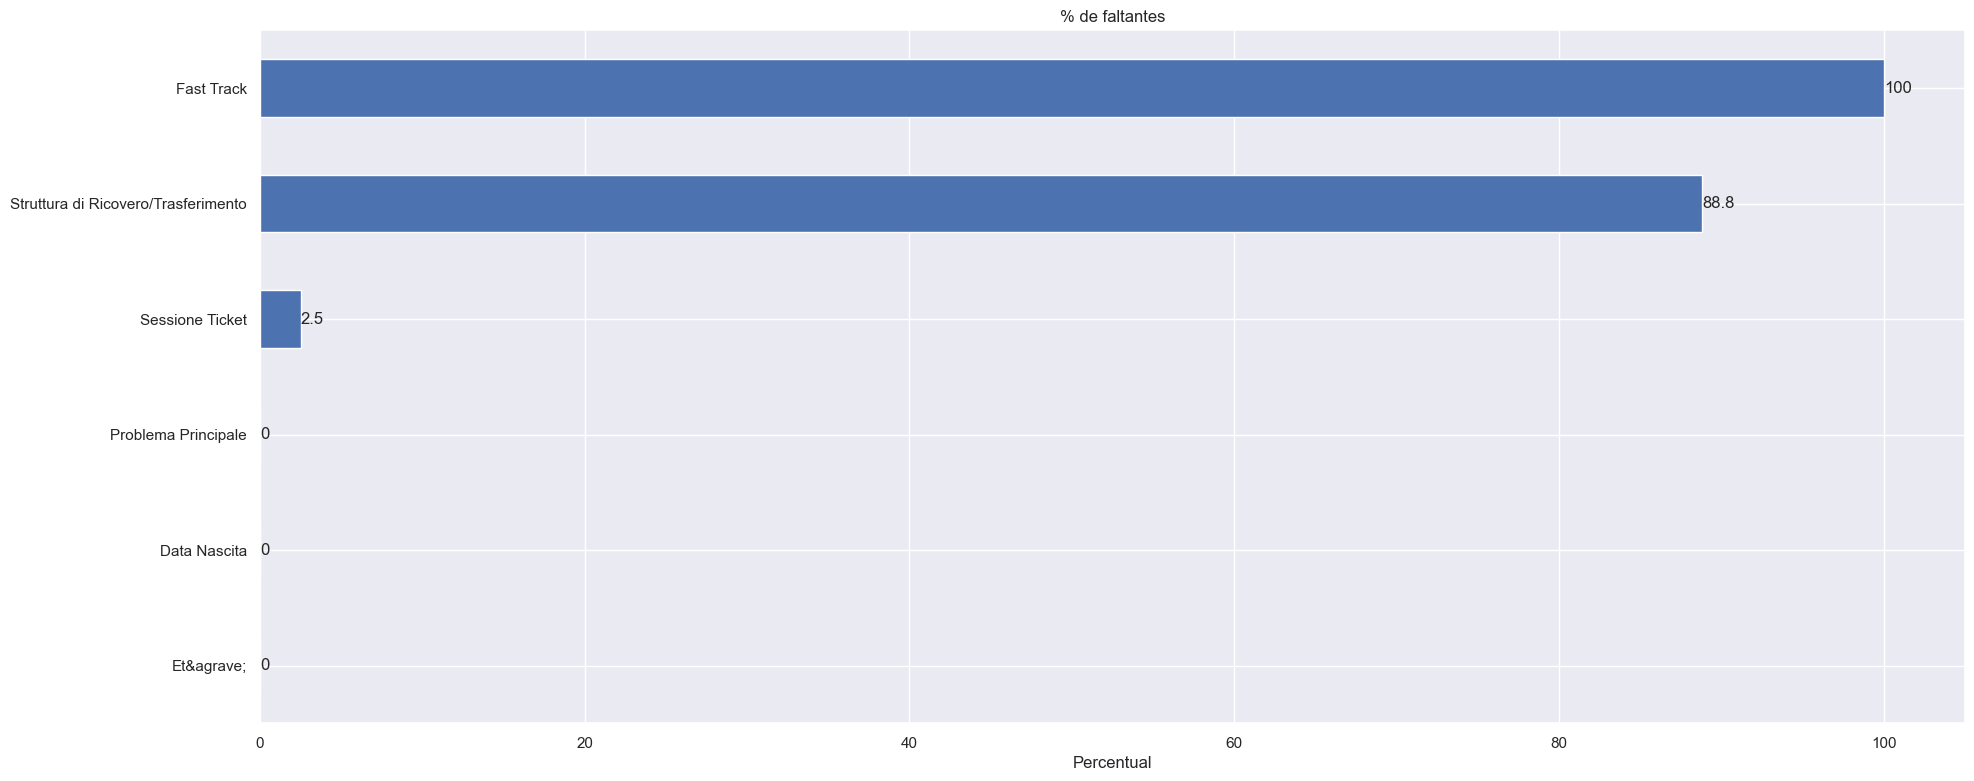

In [9]:
plota_ausentes(df, '% de faltantes', 'Percentual')

In [10]:
df.drop(
    columns=[
        "Fast Track",
        "Struttura",
        "Struttura di Ricovero/Trasferimento",
        "Sessione Ticket",
    ],
    inplace=True,
)

df.dropna(inplace=True)

In [11]:
plota_ausentes(df, '% de faltantes', 'Percentual')

Contagem de faltantes
Urgenza                0
Data Accesso           0
Data Fine Contatto     0
Paziente               0
Modalità Dimissione    0
Problema Principale    0
Numero Scheda PS       0
Medico Dimettente      0
Et&agrave;             0
Operatore Triagista    0
Data Nascita           0
dtype: int64


## 1.7. Estatística Descritiva


In [12]:
# Separando os atributos entre numéricos e categóricos
numericos = df.select_dtypes(exclude=['object'])

categoricos = df.select_dtypes(include=['object'])

### 1.7.1 Atributos Numéricos

In [13]:
numericos.describe().T

,count,mean,min,25%,50%,75%,max,std
Urgenza,160004.00,3.26,1.00,3.00,3.00,4.00,7.00,0.84
Data Accesso,160004,2023-07-16 01:20:43.678907392,2022-01-01 00:00:00,2022-10-24 00:00:00,2023-07-18 00:00:00,2024-04-12 00:00:00,2024-12-31 00:00:00,NaN
Data Fine Contatto,160004,2023-07-16 03:48:32.417189376,2022-01-01 00:00:00,2022-10-24 00:00:00,2023-07-18 00:00:00,2024-04-12 00:00:00,2025-01-01 00:00:00,NaN
Et&agrave;,160004.00,46.99,0.00,26.00,47.00,68.00,125.00,26.04
Data Nascita,160004,1978-05-30 11:41:42.747431328,1900-01-01 00:00:00,1956-11-28 00:00:00,1978-05-31 00:00:00,1999-08-14 00:00:00,2024-12-22 00:00:00,NaN


### 1.7.2 Atributos Categóricos

In [14]:
categoricos.apply(lambda x: x.unique().shape[0]).sort_values(ascending=False)

Numero Scheda PS       159808
Paziente                82135
Medico Dimettente          90
Operatore Triagista        88
Problema Principale        32
Modalità Dimissione        10
dtype: int64

In [15]:
df.sample(2)

,Urgenza,Data Accesso,Data Fine Contatto,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Et&agrave;,Operatore Triagista,Data Nascita
10888,3,2022-07-14,2022-07-15,TIBA OVIDIU IOSIF,Dimissione a domicilio,Altri sintomi sistema nervoso,2022026399,RODA ANDREA,38.00,CATTANEO SILVIA,1987-02-09
73847,4,2023-09-08,2023-09-08,MEOLA LUIGI,Dimissione a domicilio,Trauma,2023037709,ZOTTI DORA VALENTINA,42.00,vulvara alexandru,1983-02-16


### 1.8 Filtros de exclusão

In [17]:
bases_de_dados = [df, ano_2022, ano_2023, ano_2024]

# Criar um dicionário mapeando cada Paziente para sua categoria
def categoriza_paciente(quantidade):
    if quantidade < 4:
        return 'Common user'
    elif quantidade <= 5:
        return 'Frequent User'
    elif quantidade <= 9:
        return 'High User'
    else:
        return 'Heavy User'


# Função para inserir coluna subgrupo usuário em outras bases
def insere_subgrupo_usuario(dataframe):
    contagem_por_paciente = dataframe.groupby('Paziente').size()
    mapa_categorias = contagem_por_paciente.apply(categoriza_paciente)
    dataframe['Subgrupo Usuário'] = dataframe['Paziente'].map(mapa_categorias)
    return dataframe

# Função para calcular idade
def calcular_idade(dataframe, data_referencia=datetime.now()):
    dataframe['Idade'] = dataframe['Data Nascita'].apply(lambda x: int((data_referencia - x).days / 365.25) if pd.notna(x) else None)
    return dataframe
    

def aplica_filtros(dataframe):
    # Filtrar apenas os pacientes sem problemas ginecológicos
    dataframe = dataframe[dataframe['Problema Principale'] != 'Sintomi o disturbi ostetrico-ginecologici']
    # Filtrar pacientes maiores que 14 anos
    dataframe = dataframe[dataframe['Idade'] > 14]
    # Filtrar pacientes com abandono precoce
    dataframe = dataframe[dataframe['Modalità Dimissione'] != 'Abbandono prima di visita medica']       
    # Filtrar pacientes com cartao PS repetido
    dataframe = dataframe.drop_duplicates(subset=['Numero Scheda PS'], keep='first')
    return dataframe



# Adicionar a coluna no dataframe original
# df['Subgrupo Usuário'] = df['Paziente'].map(mapa_categorias)

display(ano_2022.head(2))

# Aplicar todos os filtros e alterações em todos os dataframes da bases_de_dados
for dataframe in bases_de_dados:
    dataframe = calcular_idade(dataframe)
    dataframe = aplica_filtros(dataframe)
    dataframe = insere_subgrupo_usuario(dataframe)

display(ano_2022.head(2))


# Verificar a distribuição das categorias criadas
print("Distribuição de ATENDIMENTOS por categoria:")
print(df['Subgrupo Usuário'].value_counts().sort_index())
print("\n" + "="*80)


print("Distribuição de PACIENTES ÚNICOS por categoria:")
pacientes_unicos_por_categoria = df.groupby('Subgrupo Usuário')['Numero Scheda PS'].nunique().sort_index()
print(pacientes_unicos_por_categoria)
print("\n" + "="*80)
print(f"Total de pacientes únicos: {df['Numero Scheda PS'].nunique()}")
print(f"Total de atendimentos: {len(df)}")

,Urgenza,Data Accesso,Data Fine Contatto,Struttura,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Struttura di Ricovero/Trasferimento,Et&agrave;,Fast Track,Operatore Triagista,Sessione Ticket,Data Nascita,Idade
0,3,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,NaN,43,NaN,CRESCINI SONIA,803877.00,1982-11-19,43
1,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,NaN,47,NaN,MACALUSO LIBORIO FABIO,804837.00,1978-05-11,47


,Urgenza,Data Accesso,Data Fine Contatto,Struttura,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Struttura di Ricovero/Trasferimento,Et&agrave;,Fast Track,Operatore Triagista,Sessione Ticket,Data Nascita,Idade
0,3,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,NaN,43,NaN,CRESCINI SONIA,803877.00,1982-11-19,43
1,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,NaN,47,NaN,MACALUSO LIBORIO FABIO,804837.00,1978-05-11,47


Distribuição de ATENDIMENTOS por categoria:


KeyError: 'Subgrupo Usuário'

In [ ]:
# Conferindo a volumetria
print("Números totais da base")
print(f"Atendimentos:           {df.shape[0]}")
print(f"Pazientes:              {df['Paziente'].nunique()}")
print(f"Cartões PS únicos:      {df['Numero Scheda PS'].nunique()}")
print(f"Cartões PS repetidos:   {df.shape[0] - df['Numero Scheda PS'].nunique()}")

Dados anteriores:

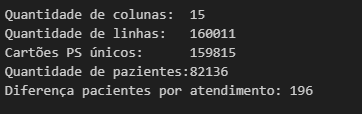

# 2 - Análise exploratória dos dados

## 2.1. Análise Univariada

### Verificando a variância das variáveis numéricas

In [ ]:
df.shape

In [ ]:
numericos.columns

## 2.2. Análise Bivariada

In [ ]:
df.head(2)

### Lista dos pacientes com mais atendimentos por período

In [ ]:
# df
# ano_2022
# ano_2023
# ano_2024

In [ ]:
def agrupa(dataframe, top_n=10):
    # Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
    agrupado = dataframe[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False).head(top_n)
    agrupado.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    
    display(agrupado)
    return agrupado

def gera_graficos_agrupados(dataframe, titulo_periodo, top_n=10):
    # Gráfico de barras - Top 10 pacientes com mais visitas ao PS
    plt.figure(figsize=(14, 8))
    ax = dataframe.sort_values(by='Quantidade de Visitas', ascending=True).plot(kind='barh', legend=False, color='steelblue')
    ax.set_xlabel('Quantidade de Visitas', fontsize=12)
    ax.set_ylabel('Paciente', fontsize=12)

    ax.set_title(f'Top {top_n} Pacientes com Mais Visitas ao Pronto Socorro no ' + titulo_periodo, fontsize=14, fontweight='bold')

    # Adicionar valores nas barras
    for i, v in enumerate(dataframe.sort_values(by='Quantidade de Visitas', ascending=True)['Quantidade de Visitas']):
        ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

    plt.tight_layout()
    plt.show();

def plota_mais_frequentes(dataframe, titulo, top_n=10):
    agrupado = agrupa(dataframe, top_n)  
    gera_graficos_agrupados(agrupado, titulo, top_n)

plota_mais_frequentes(ano_2024, 'Ano de 2024', top_n=15)

In [ ]:
# Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
agrupado = df[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False).head(20)
agrupado.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)

periodo = "período de 2022 a 2024"
agrupado

In [ ]:
# Gráfico de barras - Top 10 pacientes com mais visitas ao PS
plt.figure(figsize=(14, 8))
ax = agrupado.sort_values(by='Quantidade de Visitas', ascending=True).plot(kind='barh', legend=False, color='steelblue')
ax.set_xlabel('Quantidade de Visitas', fontsize=12)
ax.set_ylabel('Paciente', fontsize=12)

ax.set_title('Top 10 Pacientes com Mais Visitas ao Pronto Socorro no ' + periodo, fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(agrupado.sort_values(by='Quantidade de Visitas', ascending=True)['Quantidade de Visitas']):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show();

### Lista dos pacientes com mais atendimentos (nome e idade)

In [ ]:
# Calcular a idade dos pacientes a partir da data de nascimento
from datetime import datetime

# Converter a coluna de data de nascimento para datetime
df['Data Nascita'] = pd.to_datetime(df['Data Nascita'], errors='coerce')

# Calcular a idade com base na data atual
data_referencia = datetime.now()
df['Idade'] = df['Data Nascita'].apply(
    lambda x: int((data_referencia - x).days / 365.25) if pd.notna(x) else None
)

# Agrupar por paciente e contar visitas, mantendo a idade
pacientes_info = (
    df[['Paziente', 'Numero Scheda PS', 'Idade']]
    .groupby(['Paziente', 'Idade'])
    .count()
    .reset_index()
    .sort_values(by='Numero Scheda PS', ascending=False)
    .head(20)
)

# Renomear colunas para melhor visualização
pacientes_info.rename(
    columns={
        'Paziente': 'Nome do Paciente',
        'Numero Scheda PS': 'Quantidade de Visitas',
        'Idade': 'Idade (anos)'
    }, 
    inplace=True
)

# Resetar o índice para exibição mais limpa
pacientes_info.reset_index(drop=True, inplace=True)
pacientes_info.index = pacientes_info.index + 1  # Começar índice em 1

print(f"Top 10 Pacientes com Mais Atendimentos no PS - {periodo}")
print("=" * 80)
pacientes_info

### Análise de atendimentos por dia da semana

In [ ]:
# Converter a coluna de data de entrada para datetime
df["Data Accesso"] = pd.to_datetime(df["Data Accesso"], errors="coerce")

# Criar coluna com o dia da semana
df["Dia_Semana"] = df["Data Accesso"].dt.day_name()

# Mapear os nomes em inglês para italiano
mapeamento_dias = {
    "Monday": "Lunedi",
    "Tuesday": "Martedi",
    "Wednesday": "Mercoledi",
    "Thursday": "Giovedi",
    "Friday": "Venerdi",
    "Saturday": "Sabato",
    "Sunday": "Domenica",
}
df["settimana"] = df["Dia_Semana"].map(mapeamento_dias)

# Contar atendimentos por dia da semana
atendimentos_por_dia = df["settimana"].value_counts()

# Ordenar pelos dias da semana
ordem_dias = [
    "Lunedi",
    "Martedi",
    "Mercoledi",
    "Giovedi",
    "Venerdi",
    "Sabato",
    "Domenica",
]
atendimentos_por_dia = atendimentos_por_dia.reindex(ordem_dias)

print(f"Distribuição de Atendimentos por Dia da Semana - {periodo}")
print("=" * 80)
atendimentos_por_dia

In [ ]:
# Gráfico de barras - Atendimentos por dia da semana
plt.figure(figsize=(14, 8))
ax = atendimentos_por_dia.plot(kind='bar', color='coral', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Dia da Semana', fontsize=12)
ax.set_ylabel('Quantidade de Atendimentos', fontsize=12)
ax.set_title(f'Distribuição de Atendimentos por Dia da Semana - {periodo}', 
             fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(atendimentos_por_dia):
    ax.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adicionar linha de média
media_atendimentos = atendimentos_por_dia.mean()
ax.axhline(y=media_atendimentos, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_atendimentos:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

### Análise dos 10 principais problemas de saúde

In [ ]:
# Contar os principais problemas de saúde
principais_problemas = df['Problema Principale'].value_counts().head(10)

print(f"Top 10 Principais Problemas de Saúde - {periodo}")
print("=" * 80)
principais_problemas

In [ ]:
# Gráfico de barras - Top 10 principais problemas
plt.figure(figsize=(16, 8))
ax = principais_problemas.sort_values(ascending=True).plot(
    kind='barh', 
    color='mediumseagreen', 
    edgecolor='black', 
    linewidth=1.2
)
ax.set_xlabel('Quantidade de Atendimentos', fontsize=12)
ax.set_ylabel('Problema Principal', fontsize=12)
ax.set_title(f'Top 10 Principais Problemas de Saúde - {periodo}', 
             fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(principais_problemas.sort_values(ascending=True)):
    ax.text(v + 20, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

# Adicionar linha de média
media_problemas = principais_problemas.mean()
ax.axvline(x=media_problemas, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_problemas:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Gráfico de pizza - Proporção dos 10 principais problemas
plt.figure(figsize=(12, 12))

# Criar o gráfico de pizza
colors = plt.cm.Set3(range(len(principais_problemas)))
wedges, texts, autotexts = plt.pie(
    principais_problemas, 
    labels=principais_problemas.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

# Melhorar a legibilidade dos percentuais
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

plt.title(f'Proporção dos 10 Principais Problemas de Saúde - {periodo}', 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Análise de atendimentos por mês

In [ ]:
# Criar coluna com o mês e ano
df['Mes_Ano'] = df['Data Accesso'].dt.to_period('M')

# Contar atendimentos por mês
atendimentos_por_mes = df['Mes_Ano'].value_counts().sort_index()

# Converter o período de volta para string para melhor visualização
atendimentos_por_mes.index = atendimentos_por_mes.index.astype(str)

print(f"Distribuição de Atendimentos por Mês - {periodo}")
print("=" * 80)
atendimentos_por_mes

In [ ]:
# Gráfico de linha - Atendimentos por mês
plt.figure(figsize=(18, 8))
ax = atendimentos_por_mes.plot(kind='line', marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_xlabel('Mês/Ano', fontsize=12)
ax.set_ylabel('Quantidade de Atendimentos', fontsize=12)
ax.set_title(f'Evolução Temporal de Atendimentos por Mês - {periodo}', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

# Rotacionar labels do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar linha de média
media_mensal = atendimentos_por_mes.mean()
ax.axhline(y=media_mensal, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_mensal:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Top 10 meses com mais atendimentos
top_10_meses = atendimentos_por_mes.nlargest(10)

# Gráfico de barras - Top 10 meses
plt.figure(figsize=(14, 8))
ax = top_10_meses.sort_values(ascending=True).plot(
    kind='barh', 
    color='darkblue', 
    edgecolor='black', 
    linewidth=1.2
)
ax.set_xlabel('Quantidade de Atendimentos', fontsize=12)
ax.set_ylabel('Mês/Ano', fontsize=12)
ax.set_title(f'Top 10 Meses com Mais Atendimentos - {periodo}', 
             fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(top_10_meses.sort_values(ascending=True)):
    ax.text(v + 10, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Análise de categorias de usuários (Subgrupo Usuário)

In [ ]:
pacientes_unicos = df[['Paziente', 'Subgrupo Usuário']]
pacientes_unicos.drop_duplicates(inplace=True)
pacientes_unicos.shape

In [ ]:
# Limpa o dataset para ficar apenas os pacientes únicos
pacientes_unicos = df[['Paziente', 'Subgrupo Usuário']]
pacientes_unicos.drop_duplicates(inplace=True)

# Contar pacientes por categoria de subgrupo
categorias_usuarios = pacientes_unicos['Subgrupo Usuário'].value_counts()

# Ordenar pelas categorias definidas
ordem_categorias = ['Common user', 'Frequent User', 'High User', 'Heavy User']
categorias_usuarios = categorias_usuarios.reindex(ordem_categorias)

# Calcular percentuais
percentuais = (categorias_usuarios / categorias_usuarios.sum() * 100).round(2)

print(f"Distribuição de Pacientes por Categoria de Uso - {periodo}")
print("=" * 90)
print("\n📊 CONTAGEM ABSOLUTA:")
print(categorias_usuarios)
print("\n📈 PERCENTUAL POR CATEGORIA:")
for cat, valor in percentuais.items():
    print(f"  {cat:20s}: {valor:>6.2f}%")
print("\n" + "=" * 90)
print(f"TOTAL DE PACIENTES: {categorias_usuarios.sum():,}")

In [ ]:
# Gráfico de barras comparativo - Contagem vs Percentual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Gráfico 1: Contagem absoluta
colors_gradient = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
categorias_usuarios.plot(kind='bar', color=colors_gradient, edgecolor='black', linewidth=1.5, ax=ax1)
ax1.set_xlabel('Categoria de Usuário', fontsize=13, fontweight='bold')
ax1.set_ylabel('Quantidade de Atendimentos', fontsize=13, fontweight='bold')
ax1.set_title(f'Contagem Absoluta por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Adicionar valores nas barras
for i, v in enumerate(categorias_usuarios):
    ax1.text(i, v + 200, f'{v:,}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Linha de média
media_cat = categorias_usuarios.mean()
ax1.axhline(y=media_cat, color='red', linestyle='--', linewidth=2.5, 
            label=f'Média: {media_cat:,.0f}', alpha=0.7)
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Gráfico 2: Percentual
percentuais.plot(kind='bar', color=colors_gradient, edgecolor='black', linewidth=1.5, ax=ax2)
ax2.set_xlabel('Categoria de Usuário', fontsize=13, fontweight='bold')
ax2.set_ylabel('Percentual (%)', fontsize=13, fontweight='bold')
ax2.set_title(f'Proporção Percentual por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Adicionar valores nas barras
for i, v in enumerate(percentuais):
    ax2.text(i, v + 0.8, f'{v:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
# Gráficos de pizza - Comparação visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# Pizza 1: Percentuais
colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
wedges, texts, autotexts = ax1.pie(
    categorias_usuarios, 
    labels=categorias_usuarios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax1.set_title(f'Proporção Percentual por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=20)

# Pizza 2: Valores absolutos
wedges2, texts2, autotexts2 = ax2.pie(
    categorias_usuarios, 
    labels=categorias_usuarios.index,
    autopct=lambda pct: f'{int(pct/100 * categorias_usuarios.sum()):,}',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax2.set_title(f'Contagem Absoluta por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [ ]:
# Gráfico de barras horizontais com métricas completas
plt.figure(figsize=(16, 9))
y_pos = np.arange(len(categorias_usuarios))

# Criar barras horizontais
bars = plt.barh(y_pos, categorias_usuarios.values, 
                color=colors_gradient, edgecolor='black', linewidth=1.5, height=0.6)

# Customizar eixos
plt.xlabel('Quantidade de Atendimentos', fontsize=14, fontweight='bold')
plt.ylabel('Categoria de Usuário', fontsize=14, fontweight='bold')
plt.title(f'Análise Detalhada de Atendimentos por Categoria de Usuário\n{periodo}', 
          fontsize=16, fontweight='bold', pad=20)
plt.yticks(y_pos, categorias_usuarios.index, fontsize=12)

# Adicionar valores, percentuais e informações extras nas barras
for i, (v, p) in enumerate(zip(categorias_usuarios.values, percentuais.values)):
    # Valor absoluto e percentual
    plt.text(v + 100, i, f'{v:,} ({p:.1f}%)', 
             va='center', fontsize=12, fontweight='bold')
    
    # Barra colorida por categoria
    bars[i].set_alpha(0.8)

# Adicionar linha de média
plt.axvline(x=media_cat, color='red', linestyle='--', linewidth=3, 
            label=f'Média: {media_cat:,.0f}', alpha=0.8)

# Adicionar grade e legenda
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='lower right', framealpha=0.9)

plt.tight_layout()
plt.show()

In [ ]:
# Tabela resumo estatístico detalhada
resumo_categorias = pd.DataFrame({
    'Categoria': categorias_usuarios.index,
    'Contagem': categorias_usuarios.values,
    'Percentual (%)': percentuais.values,
    'Acumulado': categorias_usuarios.cumsum().values,
    'Perc. Acumulado (%)': percentuais.cumsum().round(2).values
})

print(f"\n{'='*100}")
print(f"{'RESUMO ESTATÍSTICO DETALHADO - CATEGORIAS DE USUÁRIOS':^100}")
print(f"{'Período: ' + periodo:^100}")
print(f"{'='*100}\n")
print(resumo_categorias.to_string(index=False))
print(f"\n{'='*100}")
print(f"📊 TOTAL DE ATENDIMENTOS: {categorias_usuarios.sum():,}")
print(f"📈 NÚMERO DE CATEGORIAS: {len(categorias_usuarios)}")
print(f"📉 MÉDIA POR CATEGORIA: {media_cat:,.2f}")
print(f"📌 DESVIO PADRÃO: {categorias_usuarios.std():,.2f}")
print(f"{'='*100}\n")

# Exibir insights
print("💡 INSIGHTS:")
categoria_maior = categorias_usuarios.idxmax()
categoria_menor = categorias_usuarios.idxmin()
print(f"   • Categoria com MAIS atendimentos: {categoria_maior} ({categorias_usuarios.max():,} - {percentuais.max():.1f}%)")
print(f"   • Categoria com MENOS atendimentos: {categoria_menor} ({categorias_usuarios.min():,} - {percentuais.min():.1f}%)")
print(f"   • Diferença entre maior e menor: {categorias_usuarios.max() - categorias_usuarios.min():,} atendimentos")
print(f"{'='*100}")

In [ ]:
print(errrrooooooooooooooooooo)